In [10]:
import pandas as pd
import os
# Read data into papers
papers = pd.read_csv('/home/purvj/Documents/Final Year Project/CSV/True.csv')
# Print head
papers.head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
papers = papers.drop(columns=['title', 'subject', 'date'], axis=1).sample(100)
papers.head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
7523,(Reuters) - Hillary Clinton’s signature colorf...
2134,BERLIN/LONDON (Reuters) - America’s closest al...
3081,WASHINGTON (Reuters) - The White House is brin...
7750,(Reuters) - An estimated 71.6 million people w...
19924,LONDON (Reuters) - British police are chasing ...


In [12]:
import re
papers['text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<ipython-input-12-95ea097bb59b>:3: DeprecationWarning: invalid escape sequence \.
  papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))


In [17]:
# Convert the titles to lowercase
papers['text_processed'] = \
papers['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['text_processed'].head()

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7523     (reuters) - hillary clinton’s signature colorf...
2134     berlin/london (reuters) - america’s closest al...
3081     washington (reuters) - the white house is brin...
7750     (reuters) - an estimated 716 million people wa...
19924    london (reuters) - british police are chasing ...
Name: text_processed, dtype: object

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


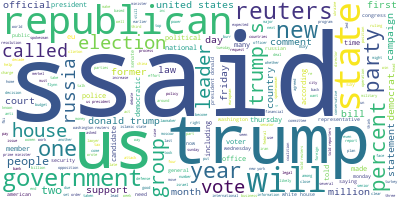

In [18]:
from wordcloud import WordCloud
long_string = ','.join(list(papers['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [19]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.text_processed.values.tolist()
data_words = list(sent_to_words(data))


data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /home/purvj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['reuters', 'hillary', 'clinton', 'signature', 'colorful', 'pantsuits', 'got', 'shout', 'dozens', 'women', 'staged', 'flashmob', 'support', 'democratic', 'presidential', 'candidate', 'washington', 'dc', 'dressed', 'red', 'black', 'blue', 'pink', 'pantsuits', 'group', 'danced', 'friday', 'salute', 'british', 'girl']


In [20]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 5), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/purvj/anaconda3/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [21]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"said" + 0.007*"would" + 0.004*"trump" + 0.004*"state" + 0.004*"us" + '
  '0.003*"reuters" + 0.003*"law" + 0.003*"republican" + 0.003*"court" + '
  '0.003*"house"'),
 (1,
  '0.011*"said" + 0.007*"us" + 0.005*"state" + 0.005*"reuters" + 0.005*"trump" '
  '+ 0.004*"government" + 0.004*"would" + 0.003*"saying" + 0.002*"house" + '
  '0.002*"campaign"'),
 (2,
  '0.017*"said" + 0.006*"government" + 0.006*"trump" + 0.004*"would" + '
  '0.004*"reuters" + 0.004*"percent" + 0.004*"party" + 0.004*"one" + '
  '0.004*"president" + 0.004*"year"'),
 (3,
  '0.013*"said" + 0.006*"us" + 0.005*"trump" + 0.005*"party" + 0.005*"reuters" '
  '+ 0.005*"would" + 0.004*"president" + 0.004*"told" + 0.003*"state" + '
  '0.003*"one"'),
 (4,
  '0.015*"said" + 0.009*"us" + 0.008*"trump" + 0.006*"reuters" + 0.006*"state" '
  '+ 0.005*"president" + 0.004*"house" + 0.004*"new" + 0.003*"washington" + '
  '0.003*"russia"'),
 (5,
  '0.016*"said" + 0.009*"trump" + 0.007*"party" + 0.006*"us" + 0.006*"would" +

In [23]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/home/purvj/Documents/Final Year Project/result/true/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/home/purvj/Documents/Final Year Project/result/true/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.031474  0.001980       1        1  17.529617
8      0.001501 -0.029581       2        1  16.602183
6      0.016962 -0.023616       3        1  12.603878
7     -0.000279 -0.014860       4        1  11.231782
2      0.028966  0.028603       5        1  11.125371
9      0.011908  0.007054       6        1   9.464138
3     -0.013977  0.022944       7        1   7.630912
5      0.017563 -0.001769       8        1   6.412813
0     -0.006125  0.009193       9        1   5.414631
1     -0.025044  0.000052      10        1   1.984675, topic_info=           Term        Freq       Total Category  logprob  loglift
78         said  309.000000  309.000000  Default  30.0000  30.0000
101          us  142.000000  142.000000  Default  29.0000  29.0000
107       would   99.000000   99.000000  Default  28.0000  28.0000
244       party   65.000000   65.000000  Default  27.0000  27.0000
171  government   57.000000   57.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
225    national    0.672153   34.963074  Topic10  -6.4315  -0.0318
75   republican    0.723803   74.077089  Topic10  -6.3574  -0.7086
296        told    0.687400   51.971891  Topic10  -6.4090  -0.4058
439    security    0.682247   48.931460  Topic10  -6.4165  -0.3531
244       party    0.689707   65.619425  Topic10  -6.4057  -0.6356

[754 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3770      1  0.275899      aapi
3770      4  0.275899      aapi
5619      1  0.754175  abdeslam
2909      1  0.133312  abortion
2909      2  0.133312  abortion
...     ...       ...       ...
2688      1  0.544300       ypg
2688      2  0.272150       ypg
4147      5  0.602547    zagreb
1669      6  0.285068      zanu
1669      7  0.570136      zanu

[1756 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 7, 8, 3, 10, 4, 6, 1, 2])